In [ ]:
# !pip install /content/imt_lightcurve-1.2-py3-none-any.whl

In [141]:
LIGHTCURVE = '652180991'

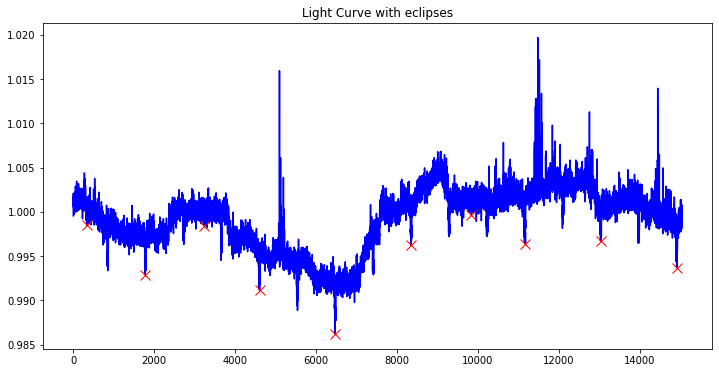

[337, 1778, 3236, 4607, 6473, 8348, 9843, 11176, 13035, 14925]
315.1208799553612


In [150]:
#@title Codigo
import pandas as pd
import numpy as np

from imt_lightcurve.models.lightcurve import LightCurve
from scipy.signal import find_peaks, peak_widths
import matplotlib.pyplot as plt


# Chosen a LightCurve to simulation process
curve_id = int(LIGHTCURVE)
P = LightCurve.get_true_value(curve_id, 'Per')
# print(f'Period is {round(P, 4)} days')

# Importing lightcurve data from github
data = pd.read_csv('https://raw.githubusercontent.com/Guilherme-SSB/IC-CoRoT_Kepler/main/resampled_files/' + LIGHTCURVE + '.csv')
flux = data.WHITEFLUX.to_numpy()
flux = flux/np.median(flux)
time = np.arange(0, len(flux))

curve = LightCurve(time, flux)
curve.plot()

inverted_curve = LightCurve(time=curve.time, flux=-1*curve.flux)
peaks, _ = find_peaks(inverted_curve.flux, distance=P*250)
peaks = peaks[:]
results_half = peak_widths(inverted_curve.flux, peaks, rel_height=0.5)

# Plotting 
# print()
plt.figure(figsize=(12, 6))
plt.plot(curve.flux, color='b')
plt.plot(peaks, -1*inverted_curve.flux[peaks], 'x', color='r', markersize=10)
plt.title('Light Curve with eclipses')
plt.show()

peaks = np.array(peaks)

print(list(peaks))
# print()
print(np.mean(results_half[0]))
# print()
# print(len(peaks))

In [128]:
curve.fold(curve_id).plot()

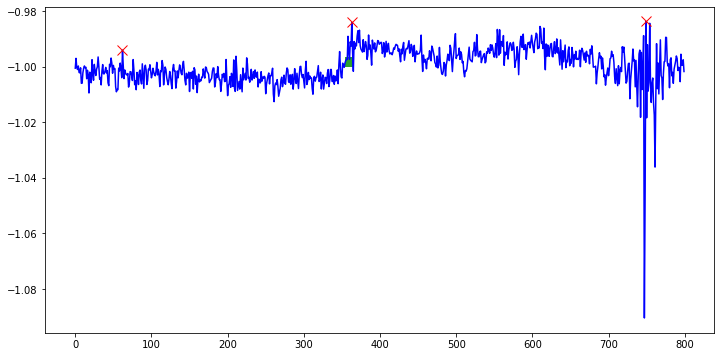

In [ ]:
x_zoom = inverted_curve.flux[:800]

peaks_zoom, _ = find_peaks(x_zoom, distance=P*100)
results_half_zoom = peak_widths(x_zoom, peaks_zoom, rel_height=0.5)
results_full_zoom = peak_widths(x_zoom, peaks_zoom, rel_height=1)

plt.figure(figsize=(12, 6))
plt.plot(x_zoom, color='b')
plt.plot(peaks_zoom, x_zoom[peaks_zoom], 'x', color='r', markersize=10)
plt.hlines(*results_half_zoom[1:], color='C2', linewidths=10)
# plt.hlines(*results_full_zoom[1:], color="C3")
plt.show()

In [ ]:
np.mean(results_half_zoom[0])

14.818868583976837

In [ ]:
curve.fold(curve_id).plot()